In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import boxplot
import itertools
from scipy import stats
import g4l

# load initial data
sample = g4l.data.Sample('./g4l/fixtures/folha.txt', [0, 1, 2, 3, 4])
initial_tree = g4l.tree.ContextTree(sample, max_depth=4)

#### In the past call we found that SMC using BIC procedure could be missing some trees, depending on the _epsilon_ provided

In [6]:
# Tree A:   c = 1.536489   (11 contexts)     -> 000 1 10 100 2 20 200 3 30 300 4
tree_a = "000 1 10 100 2 20 200 3 30 300 4"

# Tree B:   c = 1.037299   (13 contexts)     -> 000 001 10 100 2 20 200 201 21 3 30 300 4
tree_b = "000 001 10 100 2 20 200 201 21 3 30 300 4"

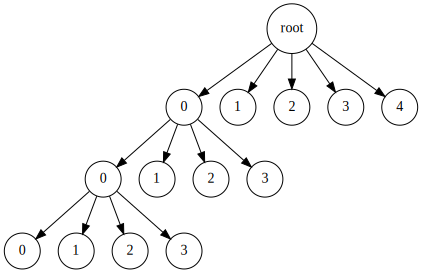

In [8]:
g4l.display.draw_tree(tree_a)

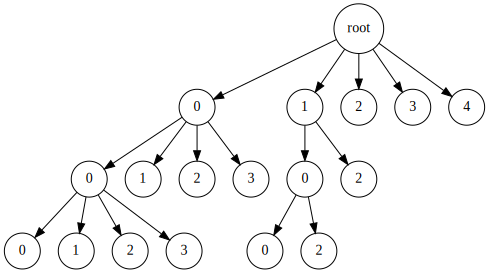

In [9]:
g4l.display.draw_tree(tree_b)

It seems that BIC procedure doesn't produce contexts by expanding one leaf per time. The following snippet shows that there's no tree with 12 contexts between $\tau_{BIC_{1.5349703969}}$ (13 contexts) and $\tau_{BIC_{1.5349703970}}$  (11 contexts) for any intermediary value of step 0.00000000001

In [16]:
last_t = ""
vmin  = 1.5349703969
vmax  = 1.5349703970
vstep = 0.00000000001
rng = np.arange(vmin, vmax, vstep)
dfx = pd.DataFrame(columns=['c', 'contexts', 't'])
pbar = tqdm()
pbar.reset(total=len(rng))
for c in rng:
    ctm = g4l.estimators.CTM(initial_tree)   
    t = ctm.execute(c)    
    pbar.update()
    sz = len(t.to_str().split(' '))
    print(c, '\t', sz, '\t', t.to_str())
    if last_t != t.to_str():
        last_t = t.to_str()        
        dfx.loc[len(dfx)] = [c, sz, t.to_str()]
pbar.refresh()
dfx

1.5349703969 	 13 	 000 001 10 100 2 20 200 201 21 3 30 300 4
1.53497039691 	 13 	 000 001 10 100 2 20 200 201 21 3 30 300 4
1.53497039692 	 13 	 000 001 10 100 2 20 200 201 21 3 30 300 4
1.53497039693 	 13 	 000 001 10 100 2 20 200 201 21 3 30 300 4
1.53497039694 	 13 	 000 001 10 100 2 20 200 201 21 3 30 300 4
1.53497039695 	 13 	 000 001 10 100 2 20 200 201 21 3 30 300 4
1.53497039696 	 13 	 000 001 10 100 2 20 200 201 21 3 30 300 4
1.53497039697 	 13 	 000 001 10 100 2 20 200 201 21 3 30 300 4
1.53497039698 	 11 	 000 1 10 100 2 20 200 3 30 300 4
1.53497039699 	 11 	 000 1 10 100 2 20 200 3 30 300 4
1.534970397 	 11 	 000 1 10 100 2 20 200 3 30 300 4


,c,contexts,t
0,1.53497,13,000 001 10 100 2 20 200 201 21 3 30 300 4
1,1.53497,11,000 1 10 100 2 20 200 3 30 300 4


True

In [17]:
last_t = ""
vmin  = 0.01
vmax  = 2.00
vstep = 0.01

rng = np.arange(vmin, vmax, vstep)
dfx = pd.DataFrame(columns=['c', 'contexts', 't'])
pbar = tqdm()
pbar.reset(total=len(rng))
for c in rng:
    ctm = g4l.estimators.CTM(initial_tree)   
    t = ctm.execute(c)    
    pbar.update()
    sz = len(t.to_str().split(' '))
    if last_t != t.to_str():
        last_t = t.to_str()        
        dfx.loc[len(dfx)] = [c, sz, t.to_str()]
pbar.refresh()
dfx

,c,contexts,t
0,0.01,127,0000 0001 0010 0012 0013 002 0020 0021 0030 00...
1,0.02,110,0000 0001 0010 0012 0013 002 0020 0021 0030 00...
2,0.03,90,0000 0001 0010 0012 0013 002 0021 003 0030 003...
3,0.04,82,0000 0001 0010 0012 002 0021 003 0030 0102 010...
4,0.05,74,0000 0001 0010 0012 002 003 0030 0102 0103 012...
5,0.06,57,0000 0001 0010 0012 002 003 0030 0102 0103 012...
6,0.07,42,0000 0001 0010 002 0030 0102 012 0130 0201 021...
7,0.14,40,0000 0001 0010 002 0102 012 0130 0201 021 0210...
8,0.15,37,0000 0001 0010 002 0102 012 0130 0201 0210 03 ...
9,0.18,34,0000 0001 0010 002 0102 012 0130 0210 03 030 1...


In [21]:
fld = '/home/arthur/Documents/Neuromat/code/SMC/euclid.aoas.1331043393/supplementary/SCRIPTS/python/g4l/fixtures/dump'
def load_trees(dump_fld, amnt_champion_trees):
    bic_tree = g4l.tree.ContextTree.load(dump_fld, 'bic_tree')
    champion_trees = []
    for i in range(amnt_champion_trees):
        ch = g4l.tree.ContextTree.load(dump_fld, 'champion.%s' % i)
        champion_trees.append(ch)
    return (bic_tree, champion_trees)
bic_tree, champion_trees = load_trees(fld, 15)

In [36]:
df_smc = pd.DataFrame(columns=['c', 'contexts', 't'])
for t in champion_trees:    
    df_smc.loc[len(df_smc)] = [t.chosen_penalty, len(t.to_str().split(' ')), t.to_str()]
df_smc

,c,contexts,t
0,0.100000,42,0000 0001 0010 002 0030 0102 012 0130 0201 021...
1,0.130510,40,0000 0001 0010 002 0102 012 0130 0201 021 0210...
2,0.143094,37,0000 0001 0010 002 0102 012 0130 0201 0210 03 ...
3,0.173601,34,0000 0001 0010 002 0102 012 0130 0210 03 030 1...
4,0.191904,27,0000 0001 0010 0130 0210 03 030 100 1210 13 2 ...
5,0.204105,26,0000 0001 0010 0210 03 030 100 1210 13 130 2 2...
6,0.228506,25,0000 001 0010 0210 03 030 100 1210 13 130 2 20...
7,0.241469,22,0000 001 0010 0210 030 100 1210 130 2 20 200 2...
8,0.302467,19,0000 001 0010 0210 100 1210 2 20 200 2000 201 ...
9,0.328388,16,0000 001 0010 100 2 20 200 2000 201 2010 21 21...


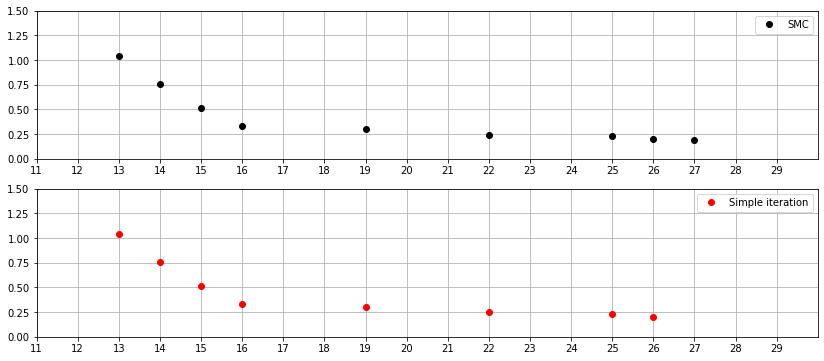

In [85]:
dfx.sort_values(['c'], inplace=True)
df_smc.sort_values(['c'], inplace=True)

plt.figure(figsize=(14, 6))
plt.subplot('211')
plt.plot(df_smc.contexts, df_smc.c, 'o', label='SMC', color='black')
plt.grid()
plt.ylim(0, 1.5)
plt.xlim(11, 30)
plt.xticks(np.arange(11, 30))
plt.legend()
plt.subplot('212')
plt.plot(dfx.contexts, dfx.c, 'o', label='Simple iteration', color='red')
plt.legend()
plt.grid()
plt.ylim(0, 1.5)
plt.xlim(11, 30)
plt.xticks(np.arange(11, 30))
plt.show()